In [1]:
from ipy import *
%matplotlib inline

In [2]:
#####  Oct 26, 2015 - 04:00 - 06:00
afg_file       = 'C:/Yuggoth/Events/2015/Oct 26/mms1_afg_srvy_l2pre_20151026_v3.14.0.cdf'
debug_file     = 'C:/Yuggoth/Events/2015/Oct 26/mms1_fpi_fast_l2pre_des-debug_20151026040000_v2.1.0.cdf'
dist_file      = 'C:/Yuggoth/Events/2015/Oct 26/mms1_fpi_fast_l2_des-dist_20151026040000_v2.1.0.cdf'
moms_file      = 'C:/Yuggoth/Events/2015/Oct 26/mms1_fpi_fast_l2_des-moms_20151026040000_v3.0.0.cdf'

####Photoelectron correction file
photo_file     = 'C:/Yuggoth/Events/2015/mms_fpi_fast_l2_des-bgdist_v1.1.0_p0-2.cdf'

obs            = 'mms1'
ver            = 'ver2'

CDFs           = {}
CDFs['AFG']    = pycdf.CDF(afg_file)
CDFs['bfield'] = pycdf.CDF(debug_file)
CDFs['dist']   = pycdf.CDF(dist_file)
CDFs['moms']   = pycdf.CDF(moms_file)
CDFs['photo']  = pycdf.CDF(photo_file)
date           = 'Oct 26 0400-0600'

time_format    = '%H:%M:%S'

#corrections
corrections_on = 1

In [3]:
dude = PAD.load_e_data(CDFs,obs,'des',ver,corrections_on,correction_override = 0.45,source='AFG')

['bfield', 'moms', 'AFG', 'dist', 'photo'] 0.45
About to fetch AFG
In AFG:
MMS:  mms1


PAD.py:208: RuntimeWarning: divide by zero encountered in divide
  counts                   = (FS_dist['Dist']/FS_dist['Err'])**2


# QA Section

A quick QA to ensure that the epochs in the debug file are in sync with those in the distribution file

In [4]:
N = 0
print 'Starting epochs for debug and dist:'
print 'Debug file:         ', CDFs['bfield']['Epoch'][N]
print 'Distribution file:  ', CDFs['dist']['Epoch'][N]
print '\n'
N = int(len(CDFs['bfield']['Epoch'])/2)
print 'Epochs for debug and dist at halfway (N=%d):' % N
print 'Debug file:         ', CDFs['bfield']['Epoch'][N]
print 'Distribution file:  ', CDFs['dist']['Epoch'][N]
print '\n'
N = -1
print 'Ending Epochs for debug and dist'
print 'Debug file:         ', CDFs['bfield']['Epoch'][N]
print 'Distribution file:  ', CDFs['dist']['Epoch'][N]
print '\n'

Starting epochs for debug and dist:
Debug file:          2015-10-26 04:00:03.891987
Distribution file:   2015-10-26 04:00:03.891987


Epochs for debug and dist at halfway (N=800):
Debug file:          2015-10-26 05:00:03.914310
Distribution file:   2015-10-26 05:00:03.914310


Ending Epochs for debug and dist
Debug file:          2015-10-26 05:59:59.438597
Distribution file:   2015-10-26 05:59:59.438597




Look at the magnetic field and find the start_time_label

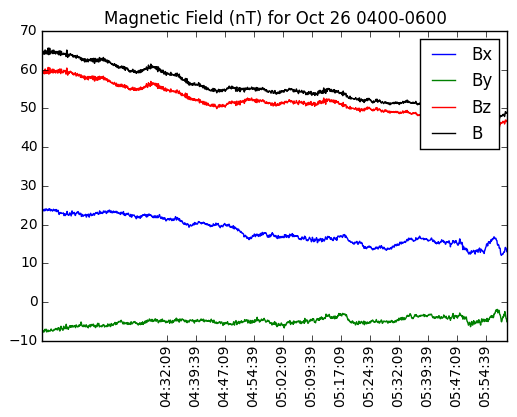

In [5]:
start_time_label = 0
time_slice       = slice(start_time_label,-1)
plt.plot(dude['bfield'][time_slice,0]*dude['bfield'][time_slice,3],label='Bx')
plt.plot(dude['bfield'][time_slice,1]*dude['bfield'][time_slice,3],label='By')
plt.plot(dude['bfield'][time_slice,2]*dude['bfield'][time_slice,3],label='Bz')
plt.plot(dude['bfield'][time_slice,3],'k-',label='B')
plt.legend()
n_B = len(dude['bfield'][:,0])
plt.title('Magnetic Field (nT) for %s' % date)
x        = np.arange(428,n_B,100)
x_labels  = []
for px in x:
    x_labels.append(dt.datetime.strftime(dude['edist']['Epoch'][px],time_format))
plt.xticks(x-start_time_label,x_labels,rotation='vertical')
plt.show()

Ensure that photoelectrons have been corrected (energy 1 and greater)

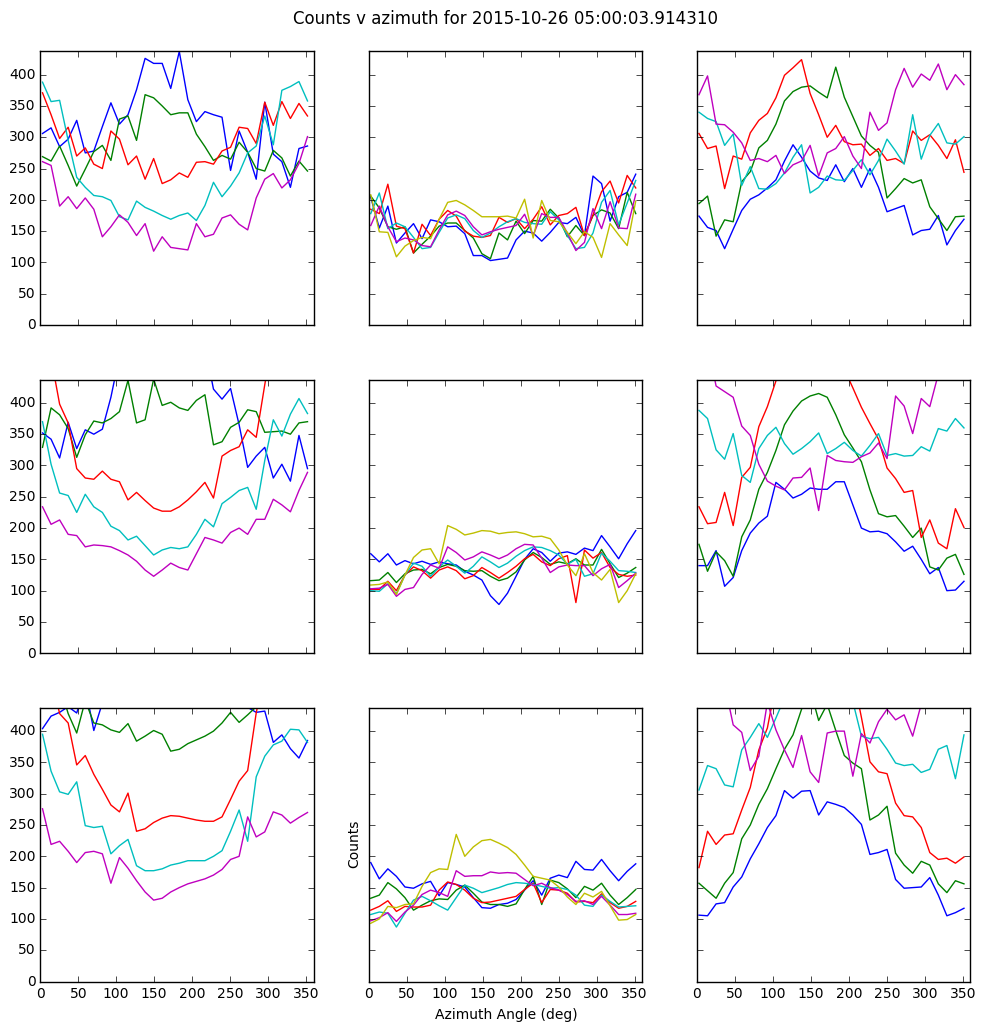

In [6]:
time_label = int(len(CDFs['bfield']['Epoch'])/2)
num_rows   = 3
fig7,axes  = plt.subplots(nrows=num_rows,ncols=3,figsize=(12,12),sharex=True,sharey=True)
for row in range(num_rows):
    for col in range(3):
        if col == 0:
            pix_range = slice(0,5)
        if col== 1:
            pix_range = slice(5,11)
            axes[row][col].annotate('Energy = %.2f ev'  % dude['parms']['Erg'][row],xy=(160,900),fontsize=10)
        if col == 2:
            pix_range = slice(11,16)
        axes[row][col].plot(dude['parms']['Phi'],dude['counts'][time_label,:,pix_range,row])
        axes[row][col].set_ylim([0,np.max(dude['counts'][time_label,:,:,0])])
        axes[row][col].set_xlim([0,360])

axes[0][1].set_title('Counts v azimuth for %s\n' % dude['edist']['Epoch'][time_label])        
axes[row][col-1].set_xlabel('Azimuth Angle (deg)')
axes[row][1].set_ylabel('Counts')
plt.show()

c:\users\cschiff\appdata\local\continuum\anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


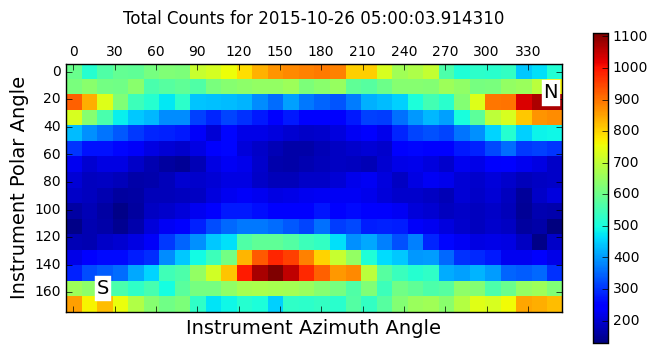

In [7]:
erg        = 1
Bx         = dude['bfield'][time_label,0]
By         = dude['bfield'][time_label,1]
Bz         = dude['bfield'][time_label,2]
BTheta     = np.arccos(Bz)*180/np.pi
BThetap    = 180.0 - BTheta
BPhi       = np.arctan2(By,Bx)*180/np.pi

if BPhi < 0:
    BPhi   = BPhi + 360

BPhip      = 360.0 - BPhi

BTheta     = BTheta/11.25
BPhi       = BPhi/11.25
BThetap    = BThetap/11.25
BPhip      = BPhip/11.25

plt.matshow(np.transpose(dude['counts'][0,:,:,erg]))#,cmap='hot')
plt.xlabel('Instrument Azimuth Angle',fontsize=14)
plt.ylabel('Instrument Polar Angle',fontsize=14)
plt.colorbar()
plt.title('Total Counts for %s\n' % dude['edist']['Epoch'][time_label])
x = np.arange(0,360,30)
y = np.arange(0,180,20)
plt.xticks(x/11.25,x)
plt.yticks(y/11.25,y)
plt.annotate('N',xy=(BPhi,BTheta),  fontsize=14,color='k',backgroundcolor='w')
plt.annotate('S',xy=(BPhip,BThetap),fontsize=14,color='k',backgroundcolor='w')

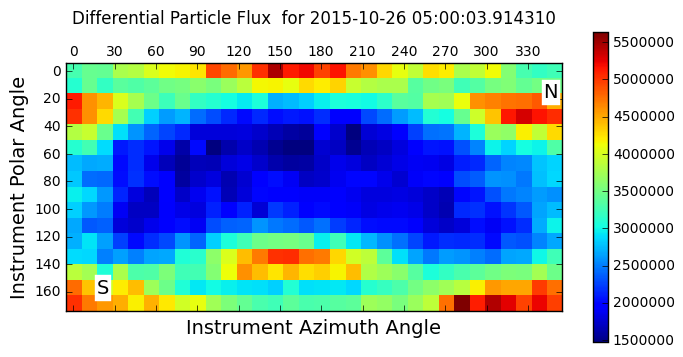

In [8]:
erg        = 0
Bx         = dude['bfield'][time_label,0]
By         = dude['bfield'][time_label,1]
Bz         = dude['bfield'][time_label,2]
BTheta     = np.arccos(Bz)*180/np.pi
BThetap    = 180.0 - BTheta
BPhi       = np.arctan2(By,Bx)*180/np.pi
if BPhi < 0:
    BPhi   = BPhi + 360
BPhip      = 360.0 - BPhi

BTheta     = BTheta/11.25
BPhi       = BPhi/11.25
BThetap    = BThetap/11.25
BPhip      = BPhip/11.25

plt.matshow(np.transpose(dude['jN'][0,:,:,erg]))#,cmap='hot')
plt.xlabel('Instrument Azimuth Angle',fontsize=14)
plt.ylabel('Instrument Polar Angle',fontsize=14)
plt.colorbar()
plt.title('Differential Particle Flux  for %s\n' % dude['edist']['Epoch'][time_label])
x = np.arange(0,360,30)
y = np.arange(0,180,20)
plt.xticks(x/11.25,x)
plt.yticks(y/11.25,y)
plt.annotate('N',xy=(BPhi,BTheta),  fontsize=14,color='k',backgroundcolor='w')
plt.annotate('S',xy=(BPhip,BThetap),fontsize=14,color='k',backgroundcolor='w')

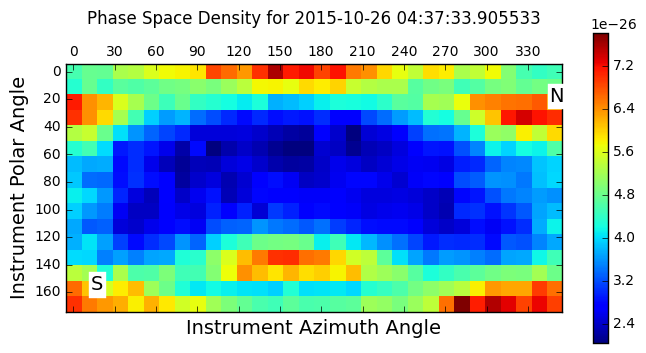

In [9]:
erg        = 0
time_label = 500
Bx         = dude['bfield'][time_label,0]
By         = dude['bfield'][time_label,1]
Bz         = dude['bfield'][time_label,2]
BTheta     = np.arccos(Bz)*180/np.pi
BThetap    = 180.0 - BTheta
BPhi       = np.arctan2(By,Bx)*180/np.pi
if BPhi < 0:
    BPhi   = BPhi + 360
BPhip      = 360.0 - BPhi

BTheta     = BTheta/11.25
BPhi       = BPhi/11.25
BThetap    = BThetap/11.25
BPhip      = BPhip/11.25

plt.matshow(np.transpose(dude['edist']['Dist'][0,:,:,erg]))#,cmap='hot')
plt.xlabel('Instrument Azimuth Angle',fontsize=14)
plt.ylabel('Instrument Polar Angle',fontsize=14)
plt.colorbar()
plt.title('Phase Space Density for %s\n' % dude['edist']['Epoch'][time_label])
x = np.arange(0,360,30)
y = np.arange(0,180,20)
plt.xticks(x/11.25,x)
plt.yticks(y/11.25,y)
plt.annotate('N',xy=(BPhi,BTheta),  fontsize=14,color='k',backgroundcolor='w')
plt.annotate('S',xy=(BPhip,BThetap),fontsize=14,color='k',backgroundcolor='w')

# Production runs of plots

In [10]:
fig_path = 'c:/Yuggoth/Events/2015/Oct 26/'
for i in range(start_time_label,len(dude['edist']['Epoch']),50):
    PAD.create_flux_survey_spectrum(i,date,fig_path,dude)
    PAD.create_smooth_survey_PAD_plot(i,date,fig_path,dude)
    PAD.create_raw_survey_PAD_plot(i,0,32,date,fig_path,dude)
    PAD.create_raw_survey_PAD_plot_LM(i,0,32,date,fig_path,dude)
    PAD.visualize_FPI_pixels_in_LM(i,date,fig_path,dude)